# <center>Part2 Python基础与科学计算</center>
### <center>Alex Fang（Tsinghua University）</center>
### <center>信息科学与技术学部，Alex.holla@foxmail.com </center>
<font color=black size=3>**摘要: **</font>
本文主要介绍Python的基础语法以及如何使用Python进行科学计算。全篇内容分为4章，分别是：**Python语言介绍**；**Python的基础知识点**；**Numpy与Pandas**；**Scipy的科学计算**。内容各有侧重，建议对Python已有编程基础的朋友可以看一下第一章，然后快速略读后面几章的实例。在下一次的笔记中，我将会结合Part1与Part2的内容，系统性地总结几种时下比较常见的可视化方法。

**关键字：**Python语言基础；科学计算；常用库

## 第一章 &emsp; Python语言介绍
相信绝大多数人都会跳过这一部分，因为我看过许许多多的python类教材，每一次我都会跳过这个部分，哈哈。然而，这次我想说的是，无论你是focus在quant 的开发还是策略上，其实你都需要了解你所使用的这门语言。为什么呢？因为我有一次面Quant Research的时候被问到过...而当时把我问到自闭了。所以，我觉得大致了解一下还是有必要的，当然，也可以更为直接地关注一下面经这部分的内容。

## $\S1.1$Python的历史
Python的作者，Guido von Rossum，1982年从阿姆斯特丹大学(University of Amsterdam)获得了数学和计算机硕士学位。在那个时候，他接触并使用过诸如Pascal、C、 Fortran等语言。这些语言的基本设计原则是让机器能更快运行。然而，受限于当时电脑的硬件配置，这些语言的速度与内存使用量成为了权衡取舍环节中的主角。Guido希望有一种语言，这种语言能够像C语言那样，能够全面调用计算机的功能**接口**，又可以像shell那样，可以**轻松的编程**。ABC语言让Guido看到希望。然而，该语言也有诸如**接口使用性差**，**传播性差**等问题。在经过很多次开发失败后，Guido将python的这次开发当做一次Hacking性质的尝试，连名字都是取自但是热播的一个电视剧。

1991年，第一个Python编译器(同时也是解释器)诞生。它是用C语言实现的，并能够调用C库(.so文件)。从一出生，Python已经具有了：类(class)，函数(function)，异常处理(exception)，包括表(list)和词典(dictionary)在内的核心数据类型，以及模块(module)为基础的拓展系统.

Python从一开始就特别在意可拓展性(extensibility)。Python可以在多个层次上拓展。从高层上，你可以引入.py文件。在底层，你可以引用C语言的库。Python程序员可以快速的使用Python写.py文件作为拓展模块。但当性能是考虑的重要因素时，Python程序员可以深入底层，写C程序，编译为.so文件引入到Python中使用。Python就好像是使用钢构建房一样，先规定好大的框架。而程序员可以在此框架下相当自由的拓展或更改。比如说我们将用到的sklearn就是用C++写的，这也在一定程度上确保了sklearn的高效性。一般情况下，我们如果自己动手写一个决策树，运行速度将远不如sklearn。经管这次课堂中可能以sklearn的实践为主，然而，我还是建议在课堂之外，大家可以自己尝试去写机器学习的算法，原因很简单，sklearn中的决策树是用信息增益还是信息增益率进行决策的，是用怎么样的剪枝规则，是如何自动处理连续性数据（将他进行二分类还是多分类，分类的临界点是用怎么样的方式确定的）。这些问题其实都很重要，而单纯使用这个包只能快速验证，希望在课堂之外，各位也能进一步**探索。**

Python在大多数时候都被视为一种**脚本语言**（虽然也有很多程序员持各种不一样的看法），说他是脚本语言，主要在于人们能够用python快速开发出一些粗糙的脚本，用以完成任务。而这些任务中，科学计算占据了绝大多数。当然，近年来，Python的网络开发也越来越火，他支持诸如Rail(Python)、Django（Python）等热门网络框架。想去BulgeBracket偏IT岗位的同学可以关注一下JavaScript和Django。

由于计算机性能的提高，软件的世界也开始随之改变。硬件足以满足许多个人电脑的需要。硬件厂商甚至渴望高需求软件的出现，以带动硬件的更新换代。C++和Java相继流行。C++和Java提供了面向对象的编程范式，以及丰富的对象库。在牺牲了一定的性能的代价下，C++和Java大大提高了程序的产量。语言的易用性被提到一个新的高度。我们还记得，ABC失败的一个重要原因是硬件的性能限制。从这方面说，Python要比ABC幸运许多。

在Python的开发过程中，社区起到了重要的作用。Guido自认为自己不是全能型的程序员，所以他只负责制订框架。如果问题太复杂，他会选择绕过去，也就是cut the corner。这些问题最终由社区中的其他人解决。社区中的人才是异常丰富的，就连创建网站，筹集基金这样与开发稍远的事情，也有人乐意于处理。如今的项目开发越来越复杂，越来越庞大，**合作以及开放的心态成为项目最终成功的关键。**


## $\S1.2$Python劣势
### 首先，我想谈一谈非常重要的一点——**Python的内存管理机制**，主要分为三个方面：

1.**引用计数机制**。Python不像C++，Java等语言一样，他们可以不用事先声明变量类型而直接对变量进行赋值。对Python语言来讲，对象的类型和内存都是在运行时确定的。这也是为什么我们称Python语言为动态类型的原因。Python采用了类似Windows内核对象一样的方式来对内存进行管理。每一个对象，都维护这一个对指向该对对象的引用的计数。我们首先创建了一个对象3.14， 然后将这个浮点数对象的引用赋值给x，因为x是第一个引用，因此，这个浮点数对象的引用计数为1. 语句y = x创建了一个指向同一个对象的引用别名y，我们发现，并没有为Y创建一个新的对象，而是将Y也指向了x指向的浮点数对象，使其引用计数为2.引用计数会因为del或者别名他用等原因而减少，也会因为多个对象指向同一对象而增加

2.**垃圾回收机制**。每过一段时间，Python就会遍历所有对象，将引用计数为0的对象删除。这种做法虽然方便简单，但是花费较大。这也就是Python运行速度比不过C++的原因之一。（临时创建临时计算+垃圾回收的花费较大，要时常遍历）

3.**内存池机制**。第0层是C中的malloc，free等内存分配和释放函数进行操作；第1层和第2层是内存池，有Python的接口函数PyMem_Malloc函数实现，当对象小于256K时有该层直接分配内存；第3层是最上层，也就是我们对Python对象的直接操作；在C中如果频繁的调用malloc与free时,是会产生性能问题的.再加上频繁的分配与释放小块的内存会产生内存碎片. Python 在这里主要干的工作有:如果请求分配的内存在1~256字节之间就使用自己的内存管理系统,否则直接使用 malloc.这里还是会调用 malloc 分配内存,但每次会分配一块大小为256k的大块内存.经由内存池登记的内存到最后还是会回收到内存池,并不会调用 C 的 free 释放掉.以便下次使用.对于简单的Python对象，例如数值、字符串，元组（tuple不允许被更改)采用的是复制的方式，也就是说当将另一个变量B赋值给变量A时，虽然A和B的内存空间仍然相同，但当A的值发生变化时，会重新给A分配空间，A和B的地址变得不再相同


### Python也有许多**力不从心**的时候：

1.作为一种脚本语言，在**运行速度**上是肯定比不过编译语言C++和Java的。因此，在一些要求延迟很短的应用场景中，如高频量化交易系统中，我们还是会使用C++来进行开发。我想这也就是很多Quant岗位说要懂Python,C++的原因吧

2.他不适合**多线程，高并发**的应用场景。Python有一个全局解释器锁（GIL），这个东西的存在限制了单个Python进程运行多个脚本的发生。但我们现在仍可以打开多个Python进行运行多个脚本。只不过在多线程开发中，Python的设计已经为其打好了一个“不适合”的标签。此外，我个人来看，需要用到多线程的场景，往往是希望节省CPU时间，在这种情况下，Python本身的速度就不占优势，不选择Python的理由也就更加充分了


## 第二章 &emsp; Python的基础知识点


## $\S2.1$数据类型
Python中的数据类型主要分为整数、浮点数、字符串。
### 整数

Python可以处理任意大小的整数，当然包括负整数，在程序中的表示方法和数学上的写法一模一样，例如：1，100，-8080，0，等等。

计算机由于使用二进制，所以，有时候用十六进制表示整数比较方便，十六进制用0x前缀和0-9，a-f表示，例如：0xff00，0xa5b4c3d2，等等。

### 浮点数

浮点数也就是小数，之所以称为浮点数，是因为按照科学记数法表示时，一个浮点数的小数点位置是可变的，比如，1.23x109和12.3x108是完全相等的。浮点数可以用数学写法，如1.23，3.14，-9.01，等等。但是对于很大或很小的浮点数，就必须用科学计数法表示，把10用e替代，1.23x109就是1.23e9，或者12.3e8，0.000012可以写成1.2e-5，等等。

### 字符串

字符串是以单引号'或双引号"括起来的任意文本，比如'abc'，"xyz"等等。请注意，''或""本身只是一种表示方式，不是字符串的一部分，因此，字符串'abc'只有a，b，c这3个字符。如果'本身也是一个字符，那就可以用""括起来，比如"I'm OK"包含的字符是I，'，m，空格，O，K这6个字符。

**接下来，我主要介绍一下这部分最重要的几个点：转义、数据类型转换、空值:**

**转义**就是通过转义符对一些特殊符号进行转义，从而避免表意不清的情况发生。

比如\n表示换行，\t表示制表符，字符\本身也要转义，所以\ \表示的字符就是\，\ \t表示\t, \t表示制表符。当然，最为简答的方法就是用r' '，print(r' ')内部的字符串默认不转义。以下是一些实例：

In [4]:
print('a \t b')
print('a \\t b')
print(r'a \t b')

a 	 b
a \t b
a \t b


Python的**数据类型转换**是真的方便，写C++还要用strcpy等函数，还要关注申明时的细节等问题，经常报错，超级麻烦（特别是调用API去下载别人数据的时候，我之前帮某位大兄弟，去把Wind TDB Level2的数据**全部**搬下来（800个G，并行），对方只支持c++，结果数据转换问题搞得我痛不欲生，似乎float32 与float64也是不兼容的）。Python转换非常方便，以下是具体实例：

In [7]:
#str转int或float
x="123"
print(int(x))
print(float(x))

#int转str,float
x=123
print(str(x))
print(float(x))

#float同理

123
123.0
123
123.0


**空值**问题，无论是在VBA、C++还是Python中，都是十分令人头痛的。空值的表现形式可能是“ ”，“null”,"nan" None等。其中None的特殊之处在于，它既不是数值0，也不是某个数据结构的空值，它本身就是一个空值对象。它的类型是NoneType，它遵循单例模式，也就是说，在同一命名空间下的所有None其实质上都是同一个空值对象。

犯难之处在于，往往你一开始并不能确定数据中的空值类型到底有哪些。因此，并不能直接用Boolean直接判断x==" ",因为这个数据可能不是空的字符串，他可能只是一个math上的空值。需要用math.isnan()来判断。但是万一对方不是这样的空值，你调用方法math.isnan()来判断就会直接报语法错误。总结来说，诸多先前判断或异常捕获是必不可少的（面对原生数据时）。以下是一个基本实例：

In [23]:
import math

a=" "

if a is None:
    pass

elif a==" ":
    print(a==" ")
    
elif math.isnan(a):
    print(a==" ")

True


## $\S2.2$几种常见数据结构
### List
Python内置的一种数据类型是列表：list。list是一种有序的集合，可以随时添加和删除其中的元素。

list.append(x)
把一个元素添加到列表的结尾。

list.extend(L)
将一个给定列表中的所有元素都添加到另一个列表中。

list.insert(i, x)
在指定位置插入一个元素。第一个参数是准备插入到其前面的那个元素的索引，例如 a.insert(0, x) 会插入到整个列表之前，而 a.insert(len(a), x) 相当于 a.append(x)。

list.remove(x)
删除列表中值为 x 的第一个元素。如果没有这样的元素，就会返回一个错误。

list.pop([i])
从列表的指定位置删除元素，并将其返回。如果没有指定索引，a.pop() 返回最后一个元素。元素随即从链表中被删除。(方法中 i 两边的方括号表示这个参数是可选的，而不是要求你输入一对方括号，这个经常会在 Python 库参考手册中遇到这样的标记。)

list.index(x)
返回列表中第一个值为 x 的元素的索引。如果没有匹配的元素就会返回一个错误。

list.count(x)
返回 x 在链表中出现的次数。

list.sort(cmp=None, key=None, reverse=False)
对列表中的元素进行排序（参数可以用来自定义排序方法，参考 sorted() 的更详细的解释）。

list.reverse()
就地倒排链表中的元素

del list[i]
有个方法可以从列表中按给定的索引而不是值来删除一个子项：del 语句。它不同于有返回值的 pop() 方法。语句 del 还可以从列表中删除切片或清空整个列表(我们以前介绍过一个方法是将空列表赋值给列表的切片)。

### Tuple 
tuple这一有序列表叫元组。tuple和list非常类似，但是tuple一旦初始化就不能修改。

tup.index(x, [start, [stop]])) 返回元组中start到stop索引中第一个值为 x 的元素在整个列表中的索引。如果没有匹配的元素就会返回一个错误。

tup.count(x) 返回 x 在元组中出现的次数。

cmp(tuple1, tuple2) 比较元组中两个元素。

len(tuple) 计算元组元素个数。

max(tuple) 返回元组中元素最大值。

min(tuple) 返回元组中元素最小值。

tuple(seq) 将列表转换为元组。

tuple我个人感觉用的比较少，基本上可以用Series或dict取代。

### Dict
字典是另一种可变容器模型，且可存储任意类型对象。字典的每个键值 key=>value 对用冒号 : 分割，每个键值对之间用逗号 , 分割，整个字典包括在花括号 {} 中 ,格式如下所示：

d = {key1 : value1, key2 : value2 }

键一般是唯一的，如果重复最后的一个键值对会替换前面的，值不需要唯一。

In [19]:
A = {'Name': 'Zara', 'Age': 7, 'Class': 'First'}

print(A['Age'])

A['Age']=8

print(A['Age'])

7
8


### Dataframe与Series
Dataframe就是一张二维表，而Series是这张表的一列切片。不同于Dict,Series虽然也有Index，但是Series的index是固定的，不像dict的key是不固定的。这也就是我个人特别喜欢series不喜欢dict的原因。往往用pandas.Dataframe读取excel文件，然后用series切片，再用A.shift（lag）-A来计算有时滞的两个序列的差。比如当前收盘价序列与未来3s的收盘价序列之差。以下简单给出范例，更多介绍将在pandas中展开。

In [21]:
import pandas

#创建
a=pandas.DataFrame(data=[],index=[],columns=[])

#赋值
Name=['Alex','Alice']
Value=['Handsome','Charming']
Age=['22','23']
a['name']=Name
a['value']=Value
a['age']=Age

a

,name,value,age
0,Alex,Handsome,22
1,Alice,Charming,23


### Array
矩阵，一维时就是个list,二维时就是dataframe,亦可支持多维运算。在Python中，矩阵主要靠numpy进行创建。同样，以下仅仅给出个别例子，更详细的介绍将在Numpy的科学计算章节中展开。

In [22]:
import numpy as np
data1 = [6, 7.5, 8, 10, 11]
arr1 = np.array(data1)
arr1

array([ 6. ,  7.5,  8. , 10. , 11. ])

## $\S2.3$快速过一遍Python的判断与循环

**判断**，就是根据一个条件的正确或者错误进行分类。正确则condition1，错误则condition2。

if <条件判断1>:
    
    <执行1>
    
elif <条件判断2>:
    
    <执行2>
    
elif <条件判断3>:
    
    <执行3>
    
else:
    <执行4>
    

In [24]:
age = 20

if age >= 6:
    print('teenager')
elif age >= 18:
    print('adult')
else:
    print('kid')

teenager


**循环**

**1.for...in**

In [25]:
names = ['Michael', 'Bob', 'Tracy']
for name in names:
    print(name)

Michael
Bob
Tracy


**2.While**

In [26]:
sum = 0
n = 99
while n > 0:
    sum = sum + n
    n = n - 2
print(sum)

2500


**3.使用break、continue、pass**

In [28]:
a=100

for i in range(200):
    if i<a:
        #无任何处理
        pass
    
    if i==a:
        #继续循环
        print(i)
        continue
    
    if i>a:
        print(i)
        #跳出该循环
        break
  

100
101


## $\S2.4$ 至关重要的时间
写量化策略最重要的就是保证数据处理，而数据处理过程中不可避免的就是和时间打交道，因为量化投资本质上就是一个一维时间序列问题，图片处理就是一个二维序列问题（色彩信道暂且不看做维度），所以，在某种程度上来说，搞定了对时间的处理，其实很多图像处理上的trick应该是可以应用在量化投资领域的。

## 时间格式

在Python中，通常有这几种方式来表示时间：1）时间戳； 2）格式化的时间字符串； 3）元组（struct_time）共九个元素。

1）时间戳（timestamp）的方式：

通常来说，时间戳表示的是从1970年1月1日00:00:00开始按秒计算的偏移量。我们运行“type(time.time())”，返回的是float类型。返回时间戳方式的函数主要有time()，clock()等。

2）格式化的时间字符串，比如"%Y-%m-%d %H:%M:%S"

3）元组（struct_time）方式：

struct_time元组共有9个元素，返回struct_time的函数主要有gmtime()，localtime()，strptime()。下面列出这种方式元组中的几个元素：

struct_time(tm_year=2016, tm_mon=2, tm_mday=2, tm_hour=11, tm_min=16, tm_sec=43, tm_wday=1, tm_yday=33, tm_isdst=0)

年，月，日，时，分，秒，星期几（0-6），年的第几天，是否夏令时（默认为-1）

### 接着介绍time模块中常用的几个函数：

1）time.localtime([secs])：将一个时间戳转换为当前时区的struct_time。secs参数未提供，则以当前时间为准。

2）time.gmtime([secs])：和localtime()方法类似，gmtime()方法是将一个时间戳转换为UTC时区（0时区）的struct_time。

3）time.time()：返回当前时间的时间戳。

4）time.mktime(t)：将一个struct_time转化为时间戳。

5）time.sleep(secs)：线程推迟指定的时间运行。单位为秒。

6）time.clock()：这个需要注意，在不同的系统上含义不同。在UNIX系统上，它返回的是“进程时间”，它是用秒表示的浮点数（时间戳）。而在WINDOWS

中，第一次调用，返回的是进程运行的实际时间。而第二次之后的调用是自第一次调用以后到现在的运行时间。（实际上是以WIN32上

QueryPerformanceCounter()为基础，它比毫秒表示更为精确）

7）time.asctime([t])：把一个表示时间的元组或者struct_time表示为这种形式：'Sun Jun 20 23:21:05 1993'。如果没有参数，将会将time.localtime()作为参数传入。

8）time.ctime([secs])：把一个时间戳（按秒计算的浮点数）转化为time.asctime()的形式。如果参数未给或者为None的时候，将会默认time.time()为参

数。它的作用相当于time.asctime(time.localtime(secs))。

9）time.strftime(format[, t])：把一个代表时间的元组或者struct_time（如由time.localtime()和time.gmtime()返回）转化为格式化的时间字符串。如

果t未指定，将传入time.localtime()。如果元组中任何一个元素越界，ValueError的错误将会被抛出。

10）time.strptime(string[, format])：把一个格式化时间字符串转化为struct_time。实际上它和strftime()是逆操作。在这个函数中，format默认

为："%a %b %d %H:%M:%S %Y"。


In [29]:
import datetime
i=datetime.datetime.now() #获取当前时间和日期
print('当前的时间和日期是%s'%i)
print ("ISO格式的日期和时间是 %s" % i.isoformat() )
print ("当前的年份是 %s" %i.year)
print ("当前的月份是 %s" %i.month)
print ("当前的日期是  %s" %i.day)
print ("dd/mm/yyyy 格式是  %s/%s/%s" % (i.day, i.month, i.year) )
print ("当前小时是 %s" %i.hour)
print ("当前分钟是 %s" %i.minute)
print ("当前秒是  %s" %i.second)

当前的时间和日期是2019-02-07 14:41:25.361102
ISO格式的日期和时间是 2019-02-07T14:41:25.361102
当前的年份是 2019
当前的月份是 2
当前的日期是  7
dd/mm/yyyy 格式是  7/2/2019
当前小时是 14
当前分钟是 41
当前秒是  25


In [30]:
import time
print(time.strftime("%H:%M:%S"))
## 12 hour format ##
print (time.strftime("%I:%M:%S"))
# 日期
print (time.strftime("%d/%m/%Y"))
print (time.localtime())

14:41:35
02:41:35
07/02/2019
time.struct_time(tm_year=2019, tm_mon=2, tm_mday=7, tm_hour=14, tm_min=41, tm_sec=35, tm_wday=3, tm_yday=38, tm_isdst=0)


In [31]:
#时间戳与字符串转换
a='2013-10-10 23:40:00'
timeArray=time.strptime(a,'%Y-%m-%d %H:%M:%S')
print(timeArray)
otherStyleTime = time.strftime("%Y/%m/%d %H:%M:%S", timeArray)
print(otherStyleTime)

time.struct_time(tm_year=2013, tm_mon=10, tm_mday=10, tm_hour=23, tm_min=40, tm_sec=0, tm_wday=3, tm_yday=283, tm_isdst=-1)
2013/10/10 23:40:00


In [32]:
#日期到时间戳上的转换：
import datetime
import time
t=datetime.datetime(2014,12,6,12,10,10)
timestamp=time.mktime(t.timetuple())
print(timestamp)

1417839010.0


In [33]:
#时间方面的计算
import datetime #导入日期时间模块
today=datetime.date.today()
yesterday=today-datetime.timedelta(days=1) #用今天日期减掉时间差，参数为1天，获得昨天的日期
print (yesterday)

2019-02-06


## $\S2.5$ 一些高级特性
### 切片
例如，对L = ['Michael', 'Sarah', 'Tracy', 'Bob', 'Jack']选取前3个元素，你可能会选择写循环，但是切片可以更好的解决这一问题。以下是一些实例：

In [34]:
L = ['Michael', 'Sarah', 'Tracy', 'Bob', 'Jack']
L[0:3]

['Michael', 'Sarah', 'Tracy']

In [38]:
#最后一个
L[-1:]

['Jack']

In [37]:
#倒数第二个
L[-2:-1]

['Bob']

In [39]:
#每5个数取其中一个数
L=list(range(100))
L[::5]

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]

### 迭代
如果给定一个list或tuple，我们可以通过for循环来遍历这个list或tuple，这种遍历我们称为迭代（Iteration）。

在Python中，迭代是通过for ... in来完成的，而很多语言比如C语言，迭代list是通过下标完成的，比如Java代码：


for (i=0; i<list.length; i++) {

    n = list[i];
    
}

可以看出，Python的for循环抽象程度要高于C的for循环，因为Python的for循环不仅可以用在list或tuple上，还可以作用在其他可迭代对象上，list这种数据类型虽然有下标，但很多其他数据类型是没有下标的，但是，只要是可迭代对象，无论有无下标，都可以迭代，比如dict就可以迭代

### 列表生成式
列表生成式即List Comprehensions，是Python内置的非常简单却强大的可以用来创建list的生成式。

举个例子，要生成list [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]可以用list(range(1, 11))

In [41]:
#一个好的简化实例
list(range(1, 11))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [44]:
#然而，还有一些简化实例如下，也包括一些lambda的书写，我个人持消极观点，因为代码的通俗可阅读性远远比代码“简洁”重要
#“you shall comment”，写过多的列表生成式，可能自己非常happy，但我估计看你代码的队友可能会想挂机
[x*x for x in range(1,11) if x%2==0]

[4, 16, 36, 64, 100]

In [43]:
list1 = [3,5,-4,-1,0,-2,-6]
sorted(list1, key=lambda x: abs(x))

[0, -1, -2, 3, -4, 5, -6]

### 生成器
通过列表生成式，我们可以直接创建一个列表。但是，受到内存限制，列表容量肯定是有限的。而且，创建一个包含100万个元素的列表，不仅占用很大的存储空间，如果我们仅仅需要访问前面几个元素，那后面绝大多数元素占用的空间都白白浪费了。所以，如果列表元素可以按照某种算法推算出来，那我们是否可以在循环的过程中不断推算出后续的元素呢？**这样就不必创建完整的list，从而节省大量的空间。**在Python中，这种一边循环一边计算的机制，称为生成器generator。要创建一个generator，有很多种方法。第一种方法很简单，只要把一个列表生成式的[]改成()，就创建了一个generator。我们讲过，generator保存的是算法，每次调用next(g)，就计算出g的下一个元素的值，直到计算到最后一个元素，没有更多的元素时，抛出StopIteration的错误。

In [47]:
g=(x*x for x in range(10))
for i in range(10):
    print(next(g))
    

0
1
4
9
16
25
36
49
64
81


In [48]:
#举个例子，用generator 产生斐波那契数列
def fib(max):
    n, a, b = 0, 0, 1
    while n < max:
        #yield是关键
        yield b
        a, b = b, a + b
        n = n + 1
    return 'done'

fib(6)

<generator object fib at 0x000002ABCA9C1888>

In [50]:
#由于生成器每次都是遇到yiled就停下，把当前这个对象输出，所以，单纯输入fib(6)只会得到一个迭代的对象，对其遍历，可以取出每一个元素
for n in fib(6):
    print(n)

1
1
2
3
5
8


有兴趣的朋友，可以再自己尝试用generator写一个“八皇后”问题。

### 迭代器
我们已经知道，可以直接作用于for循环的数据类型有以下几种：一类是集合数据类型，如list、tuple、dict、set、str等；一类是generator，包括生成器和带yield的generator function。这些可以直接作用于for循环的对象统称为可迭代对象：Iterable。可以使用isinstance()判断一个对象是否是Iterable对象

你可能会问，为什么list、dict、str等数据类型不是Iterator？这是因为Python的Iterator对象表示的是一个数据流，Iterator对象可以被next()函数调用并不断返回下一个数据，直到没有数据时抛出StopIteration错误。可以把这个数据流看做是一个有序序列，但我们却不能提前知道序列的长度，只能不断通过next()函数实现按需计算下一个数据，所以Iterator的计算是惰性的，只有在需要返回下一个数据时它才会计算。Iterator甚至可以表示一个无限大的数据流，例如全体自然数。而使用list是永远不可能存储全体自然数的

In [54]:
#range
X = 'spam'
for i in range(len(X)):
    print (X[i])

s
p
a
m


In [55]:
#zip
L1 = [1,2,3,4]
L2 = [5,6,7,8]
for (x,y) in zip(L1,L2):
    print (x,y,x+y)

1 5 6
2 6 8
3 7 10
4 8 12


In [56]:
#enumerate
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
dict(enumerate(seasons, start=3))

{3: 'Spring', 4: 'Summer', 5: 'Fall', 6: 'Winter'}

**小结：**凡是可作用于for循环的对象都是Iterable类型；凡是可作用于next()函数的对象都是Iterator类型，它们表示一个惰性计算的序列；集合数据类型如list、dict、str等是Iterable但不是Iterator，不过可以通过iter()函数获得一个Iterator对象。Python的for循环本质上就是通过不断调用next()函数实现的，例如

## 第三章 &emsp; Numpy与Pandas

## $\S3.1$Numpy的矩阵的生成与矩阵运算
numpy是python矩阵运算的基础，具有**广播机制**。矩阵运算的速度又会比for循环的运算快上不少。参考大多数策略回测平台，也都是鼓励矩阵运算的。因此，numpy可以说是非常的重要了。再者，tensorflow与pytorch在本质上也只是对向量进行图形计算。我们在刚接触深度学习的时候，就被要求使用numpy完成2层的全连接神经网络的算法。因为在本质上，tensor与numpy.array是同一个东西，只不过前者使用GPU，后者使用CPU罢了。接下来，言归正传。

首先，我觉得Numpy非常重要的一点是可以帮助我们生成实验数据。回想我们最先学习数学建模，最先动手编程的时候，你所尝试的是什么？你所困惑的是什么？我所尝试的是最小二乘法的拟合。我所犯难的是，我没有原始数据。没有原始数据，会让很多想法搁置，让人的积极性荒芜于校内琐事。所以，我觉得学习numpy最大的收获是学会如何**生成实验数据**。

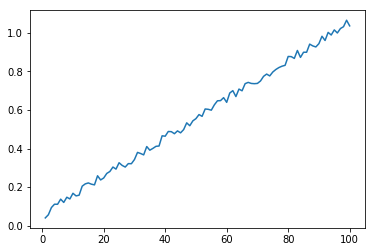

In [62]:
#生成带轻微噪声的一元二次函数\
import matplotlib.pyplot as plt
x=np.linspace(1,100,100)
noise=np.random.rand(100).astype(np.float32)*0.05
y=x*0.01+0.03+noise
plt.plot(x,y)
plt.show()

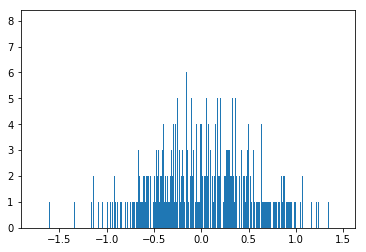

In [70]:
#生成正态分布
average=0
std=0.5
number=1000
s=np.random.normal(average,std,number)
plt.hist(s, bins=1000)
plt.show()

numpy在官方来讲，最主要还是生成矩阵。ndarray，全称应当是n dimension arrary。顾名思义，是我们指定维度n，即可创建n维的矩阵。以下是一些实例：

In [57]:
import numpy as np
data1 = [6, 7.5, 8, 10, 11]
arr1 = np.array(data1)
arr1

array([ 6. ,  7.5,  8. , 10. , 11. ])

In [2]:
#创建2*4的矩阵，数组内套数组，一个数组即一行
#可能是编程习惯，SQL语言也好，深度学习的统一数据范式也好，都是一行一个样本，每个属性都是列名。有这样的common sense，会易于理解后续很多算法
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [3]:
arr2.ndim

2

In [4]:
np.zeros((3,6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [6]:
np.((3,6))

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

In [7]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

dtype是NumPy灵活交互其它系统的源泉之一。多数情况下，它们直接映射到相应的机器表示，这使得“读写磁盘上的二进制数据流”以及“集成低级语言代码（如C、Fortran）”等工作变得更加简单。数值型dtype的命名方式相同：一个类型名（如float或int），后面跟一个用于表示各元素位长的数字。标准的双精度浮点值（即Python中的float对象）需要占用8字节（即64位）。因此，该类型在NumPy中就记作float64。numpy支持以下数据类型：
int8 unit8 | int16 unit16 | int32 unit32 | int64 unit64 | float16 float32 float64 float128 | complex64 complex128 complex256 | bool | object | string\_ | unicode\_ |。你可以通过ndarray的astype方法明确地将一个数组从一个dtype转换成另一个dtype：

In [8]:
arr = np.array([1,2,3,4,5])
arr.dtype

dtype('int32')

In [9]:
float_arr = arr.astype(np.float64)
float_arr

array([1., 2., 3., 4., 5.])

In [10]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings

array([b'1.25', b'-9.6', b'42'], dtype='|S4')

In [11]:
numeric_strings.astype(np.float)

array([ 1.25, -9.6 , 42.  ])

此外，值得一提的是。Python中的数组不像java那样。在Python中，数组一经申明，是可以再次修改的！也就是说你可以很轻松地用zeros（2,6）生成2维矩阵，然后修改其中部分元素，使其变成你想要的矩阵，而不用手动输入12个元素。

In [12]:
x=np.zeros((2,6))
x[0,0]=1
x

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

**数组的运算**

**1.索引和切片**

索引的意思是，数组的第几号位置是什么元素，你告诉我第几号，我帮你把元素取出来（**Python的索引从0开始**）（**个人建议，各位要养成写reindex函数的习惯，尤其是在pandas.dataframe和numpy的排序，筛选操作后，索引号会随着发生改变，这个时候reindex后，才能保证后续操作正常进行**）
切片是指，按照索引的跨度，一次性把一段或者多段元素提取出来

In [13]:
#索引
x[0,0]

1.0

In [14]:
#切片
arr3d = np.array([[1, 2, 3], [4, 5, 6],[7, 8, 9], [10, 11, 12]])
arr3d[2,:]

array([7, 8, 9])

**布尔型索引**

这个挺重要的，尤其是在dataframe中使用的时候。本质就是通过布尔型判断，得到一个判断的一维矩阵，然后将这个矩阵作为索引，去取元素。需要关注的是，**布尔型数组的长度必须跟被索引的轴长度一致**

In [15]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7,4)
names =='Bob'

array([ True, False, False,  True, False, False, False])

In [16]:
data[names=='Bob']

array([[-0.2723032 ,  1.16039325, -2.60953787,  1.66066332],
       [-1.12620982, -0.77123046, -0.5893145 , -1.58718139]])

In [17]:
#非常实用的reshape,将一维转变为想要的维度。此外，在sklearn的Y中，记得多加一步把数组reshape成一维，否则容易出警告（不是报错，是黑体字的warnning，看了很烦..）
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [18]:
#转置
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [19]:
#矩阵乘法
arr = np.random.randn(6, 3)
np.dot(arr.T, arr)

array([[ 4.42724704,  0.28962162, -0.34200128],
       [ 0.28962162,  3.40369809, -1.7407592 ],
       [-0.34200128, -1.7407592 ,  3.11274896]])

In [20]:
#广播机制,注意和矩阵乘法区分，不然到时候debug不出来就尴尬了...
arr = np.ones((2,6))
arr=arr*6
arr

array([[6., 6., 6., 6., 6., 6.],
       [6., 6., 6., 6., 6., 6.]])

In [21]:
#exp与sqrt都是有广播机制的，使用时务必注意
np.exp(arr)

array([[403.42879349, 403.42879349, 403.42879349, 403.42879349,
        403.42879349, 403.42879349],
       [403.42879349, 403.42879349, 403.42879349, 403.42879349,
        403.42879349, 403.42879349]])

**用numpy进行数据处理**

**示例：随机漫步**

从0开始，步长1和－1出现的概率相等。下面是一个通过内置的random模块以纯Python的方式实现1000步的随机漫步：

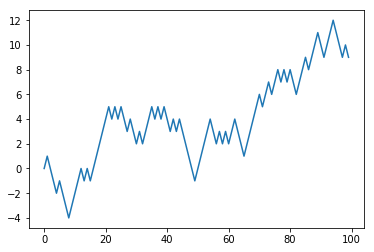

In [31]:
import random
import matplotlib.pyplot as plt
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)
plt.plot(walk[:100])

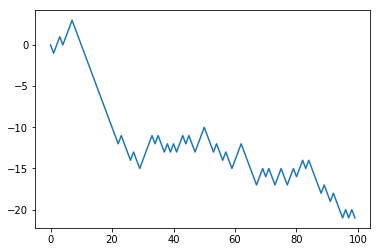

In [30]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)
plt.plot(walk[:100])

同样的设定，但是却可能在经过1000步（迭代）后出现完全不一样的走势。我想股票市场里的随机漫步、价格布朗运动可能和这个是同一个意思。

题外插一句，我对股票市场的随机漫步是很感兴趣的，看似有很多主流的方法，但是不同方法的时滞系数是不同的，且对时滞系数进行改变，结果大不相同，尽管在一定范围内，用了这个方法去筛选，都能够在分类问题上得到多多少少的正向优化。我想的是能否有对这一参数比较合理的估计方法（工程意义上），将这种方法封装成模块，以后可以在很多量化工程中随意import使用。但如果用在深度学习中，又会面临另一个问题，就是这样的筛选是一定可以提高分类准确率，但是会丢掉很多样本，深度学习太需要样本数量了。因此，我们面临了一个unpleasant的trade off.对这方面感兴趣的，可以课后联系我一起试试看.（总结主流方法，跑一些实验，做成一个好的工程）

## $\S3.2$Pandas的结构化数据处理


用Pandas读取excel文件，储存为dataframe的形式，dataframe则是一张二维表。此外，值得一提的是，python内有mysql与sql数据口的接口--pymysql,我之前用过pymysql，里面有基础的表建立、删改、查询功能，虽然不支持其他较为复杂的操作，但基本也够写一个（Python+excel+mysql）的脚本了。同理，python也有vba的接口，也可以写（Python+vba+mysql）的脚本。

#pandas读取excel

pandas.read_excel("D:\\123.xlsx")

#pandas保存excel

data.to_excel("D:\\123.xlsx")

也可以使用Pandas创建一张dataframe，然后往里面插入数据：

In [74]:
a=pandas.DataFrame(data=[],index=[],columns=[])

#赋值
Name=['Alex','Alice']
Value=['Handsome','Charming']
Age=['22','23']
a['name']=Name
a['value']=Value
a['age']=Age

a

,name,value,age
0,Alex,Handsome,22
1,Alice,Charming,23


值得注意的是，**上述一列一列的插入数据是值得推荐的，不推荐一个元素一个元素进行赋值，**因为那样的操作时间很长。因此，如果你需要替换一个元素，也应该找到那一列，对这一列的list进行元素修改，然后再重新覆盖！在数据量极大的时候，两种操作会产生极大的差别。

In [75]:
#列插入
a['address']=['Hangzhou','Hongkong']
a

,name,value,age,address
0,Alex,Handsome,22,Hangzhou
1,Alice,Charming,23,Hongkong


In [76]:
#列删除
del a['address']
a

,name,value,age
0,Alex,Handsome,22
1,Alice,Charming,23


In [77]:
#列索引
a['name']

0     Alex
1    Alice
Name: name, dtype: object

In [78]:
#行索引
a.iloc[0]

name         Alex
value    Handsome
age            22
Name: 0, dtype: object

### Series
将dataframe切片，获得series。Series有固定顺序的index,类似于数组，可以通过series[index]来获取元素；但又有不同之处，list的index只能是0,1,2,3,4……，而series的index还可以和dict的key一样，可以是字符串等。因此，用series来进行时序处理非常的方便。我仅设计一个例子，来阐述这一观点。


In [101]:
#生成样例数据
import datetime
now=datetime.datetime.now()
x=[]
for i in range(100):
    t=now+datetime.timedelta(days=i)
    x.append(str(t))

y=np.random.rand(100)*0.5+14
data=pandas.Series(y,index=x)

data.head()

2019-02-07 23:07:41.071422    14.276757
2019-02-08 23:07:41.071422    14.133023
2019-02-09 23:07:41.071422    14.018632
2019-02-10 23:07:41.071422    14.265819
2019-02-11 23:07:41.071422    14.070763
dtype: float64

In [102]:
#假设我们想算3天后的ret，则我们只需要
ret=data/data.shift(3)-1
ret=ret.dropna()
ret.head()

2019-02-10 23:07:41.071422   -0.000766
2019-02-11 23:07:41.071422   -0.004405
2019-02-12 23:07:41.071422    0.021583
2019-02-13 23:07:41.071422   -0.017713
2019-02-14 23:07:41.071422    0.026967
dtype: float64

## 第四章 &emsp; Scipy的科学计算

## $\S4.1$Numpy的矩阵的生成与矩阵运算

SciPy是一款方便、易于使用、专为科学和工程设计的Python工具包。它包括统计，优化，整合，线性代数，傅里叶变换，信号和图像处理，常微分方程求解器等等模块。SciPy库为很多问题提供了便捷且高效的数值路径解法。更详细说明可到官网查询学习 https://docs.scipy.org/doc/scipy/reference/index.html

Scipy的内容比numpy与pandas都要多，加上我自己并没有系统性的认识，所以就按照**官网的tutorial**进行介绍，但是例子尽量不选取这里面的，这里的例子都是一些复杂的物理模型，将之作为入门学习或者量化投资进阶，我都认为其必要性是极其有限的。
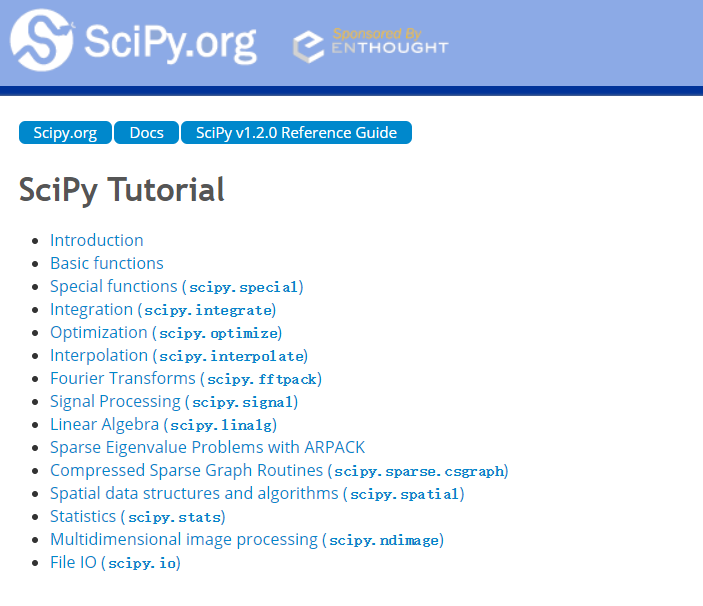


首先，介绍一下import scipy.special，可以获得很多物理、通信方面极其复杂的数学模型。这方面完全没有必要展开细讲，遇到的时候再问询CSDN或者help(scipy.special)吧。
### 单积分
quad的一般形式是scipy.integrate.quad(f，a，b)，其中'f'是要积分的函数的名称。 而'a'和'b'分别是下限和上限。现在，我们要对一个复杂的函数J2.5（x）进行积分，积分区间是[0, 4.5]，则在不求解原函数的情况下，可以这么编写：

In [103]:
import scipy.integrate as integrate
import scipy.special as special
result = integrate.quad(lambda x: special.jv(2.5,x), 0, 4.5)
result

#其中第一个数字是积分值，第二个数值是积分值绝对误差的估计值。

(1.1178179380783244, 7.866317216380707e-09)

### 双重积分
dblquad的一般形式是scipy.integrate.dblquad(func，a，b，gfun，hfun)。 其中，func是要积分函数的名称，'a'和'b'分别是x变量的下限和上限，而gfun和hfun是定义变量y的下限和上限的函数名称。
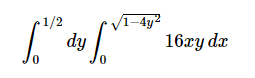

In [108]:
import scipy.integrate
from numpy import exp
from math import sqrt
f = lambda x, y : 16*x*y
g = lambda y : 0
h = lambda y : sqrt(1-4*y**2)
i = scipy.integrate.dblquad(f, 0, 0.5, g, h)
print (i)

(0.5, 1.7092350012594845e-14)


### 优化问题
其实关于参数求解的方法，是有很标准的方法的，比如最大似然估计，最小二乘法等。这些需要你还记得高数的知识。求导，然后梯度下降，多么标准的方法啊，这种思想和方法在大部分的数据挖掘算法里面都是这么干的，而且经过精巧而优美的变化，大部分问题总能将目标函数最小化转成凸优化问题。

In [115]:
import numpy as np
from scipy.optimize import minimize
def to_be_solved(x):
    return x**2+2*x+1


x0=[5]
res = minimize(to_be_solved, x0, method='nelder-mead',options={'xtol': 1e-8, 'disp': True})

res

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 33
         Function evaluations: 66


 final_simplex: (array([[-1.        ],
       [-0.99999999]]), array([0., 0.]))
           fun: 0.0
       message: 'Optimization terminated successfully.'
          nfev: 66
           nit: 33
        status: 0
       success: True
             x: array([-1.])

上述method可以尝试得有“method='Nelder-Mead'”、“method='BFGS'”、“method='Newton-CG'”等，x0是带求解参数的初始值，必须要初始化一个值给他。这个问题在这里是随便给，但是在深度学习中就很重要了，因为参数太多，局部最优点也很多，初始化的好与坏就万分重要了。可能无论你模型怎么调整，无论如何优化，因为初始点选取不佳，注定了只能收敛到局部最优点。因此，各种调参、调初始点的行为随之产生。将量化投资直接托付给一个深度学习算法，是不可取的的，但是如何让一个深度学习的可解释性增加，让他变得可以被托付，是值得研究的，这也是我的研究方向。

### 插值
插值是离散数学中的概念，在离散数据的基础上补插连续函数，使得这条连续曲线通过全部给定的离散数据点。

在实际运用中，如果数据量过少，我们可以通过插值的方式生成一些数据，来跑那些需要很多数据量的模型。

实际的插值方式有很多种，以下展示最为常见的线性插值与立方插值。

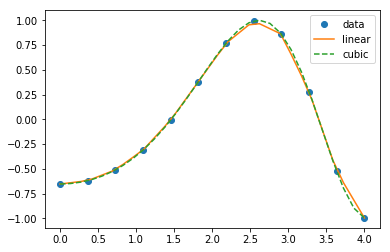

In [118]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
x = np.linspace(0, 4, 12)
y = np.cos(x**2/3+4)
xnew = np.linspace(0, 4,30)


f1 = interpolate.interp1d(x, y,kind = 'linear')   #线性
 
f2 = interpolate.interp1d(x, y, kind = 'cubic')   #立方


plt.plot(x, y, 'o', xnew, f1(xnew), '-', xnew, f2(xnew), '--')      # 三个不同类型分别显示点，实线，虚线。
 
plt.legend(['data', 'linear', 'cubic'], loc = 'best')
 
plt.show()

### 傅里叶变换
正向傅里叶变换：
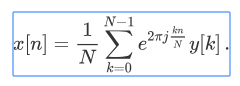

反向傅里叶变换：
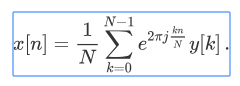

In [120]:
from scipy.fftpack import fft, ifft
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)
print(y)

yinv = ifft(y)
print(yinv)

[ 4.5       +0.j          2.08155948-1.65109876j -1.83155948+1.60822041j
 -1.83155948-1.60822041j  2.08155948+1.65109876j]
[ 1. +0.j  2. +0.j  1. +0.j -1. +0.j  1.5+0.j]


### 线性代数
scipy中所包含的线性代数相关的函数大多在scipy.linalg中，可以通过import scipy.linalg 调用，numpy中也包含部分，大部分在函数定义上是一样的，所以比较尴尬的是，我们以后说线性代数功能到底算numpy还是scipy呢？这一点我也一直很混乱，直到看到了官网的解释：
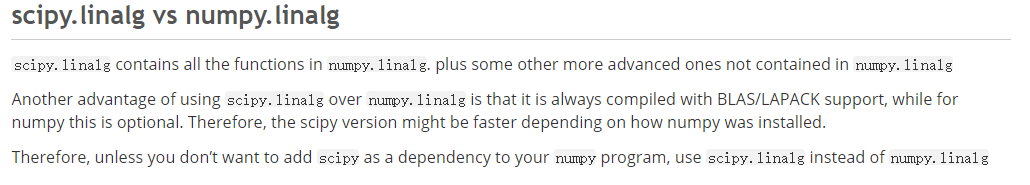
总结来说，两个包都涉及了相同的功能，如果这个脚本用不到scipy,就用numpy的linaglg；**如果用了scipy，那么就用scipy.linalg吧，因为他快一些。**

In [137]:
from scipy import linalg
A = np.array([[1,2],[3,4]])

print("求逆")
print("---------------------")
print(linalg.inv(A))

print("转置")
print("---------------------")
print(A.T)

print("矩阵乘法")
print("---------------------")
print(A.dot(A.T))

print("行列式的值")
print("---------------------")
print(linalg.norm(A))

求逆
---------------------
[[-2.   1. ]
 [ 1.5 -0.5]]
转置
---------------------
[[1 3]
 [2 4]]
矩阵乘法
---------------------
[[ 5 11]
 [11 25]]
行列式的值
---------------------
5.477225575051661


实例：解线性方程
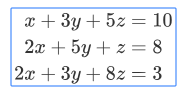


In [135]:
#方法1，较慢
A = np.array([[1, 3,5], [2, 5,1],[2,3,8]])
b = np.array([10,8,1]).T
#solution
print(linalg.inv(A).dot(b))

#check
#error
print(A.dot(linalg.inv(A).dot(b)) - b)


[-11.04   5.88   0.68]
[ 0.00000000e+00 -3.55271368e-15  0.00000000e+00]


In [136]:
#方法2，较快
#solution
print(linalg.solve(A, b))

#check
#error
print(A.dot(np.linalg.solve(A, b)) - b)

[-11.04   5.88   0.68]
[1.77635684e-15 0.00000000e+00 2.66453526e-15]


### 统计学
如果说在线性代数方面，numpy和scipy有很大的交叉性，那么，在统计学方面，总算是scipy的专长了。**from scipy import stats**。所有统计函数被放在子包scipy.stats中，且有这些函数的一个几乎完整的列表可以使用 info(stats)获得。这个列表里的随机变量也可以从stats子包的docstring中获得介绍。

在这个包中，有以下变量是需要重点关注的：

1.rvs:随机变量（就是从这个分布中抽一些样本）

2.pdf：概率密度函数。

3.cdf：累计分布函数

4.sf：残存函数（1-CDF）

5.ppf：分位点函数（CDF的逆）

6.isf：逆残存函数（sf的逆）

7.moment:分布的非中心矩

8.stats:返回均值，方差，（费舍尔）偏态，（费舍尔）峰度


#### 偏移(Shifting)与缩放(Scaling)
通常经标准化的分布的随机变量X可以通过变换(X-loc)/scale来得到，正如：

In [144]:
from scipy import stats

print("产生5个，服从标准正态分布的随机变量:")
print(stats.norm.rvs(size=5))

print("产生1个，服从均值为5的正态分布的随机变量:")
print(stats.norm.rvs(5))

print("完整实例,产生5个，服从均值为3，标准差为4的正态分布的随机变量：")
print(stats.norm.rvs(loc = 3, scale = 4, size=5))

产生5个，服从标准正态分布的随机变量:
[ 0.19724414  0.63994968 -0.61399511 -0.25656263 -0.25878061]
产生1个，服从均值为5的正态分布的随机变量:
5.117107192599357
完整实例,产生5个，服从均值为3，标准差为4的正态分布的随机变量：
[-2.695093    6.91336857 -2.26837512 10.45783042 14.05097663]


### 样本分析

**检验样本与分布**

首先，我们创建一些随机变量。我们设置一个种子所以每次我们都可以得到相同的结果以便观察。 从t分布中取一个样本，使用scipy.stats来分析这个样本与实际的t分布的差距有多大。

In [154]:
#生成数据

np.random.seed(282629734)
#这里，我们设置了t分布的形态参数，在这里就是自由度，设为10.使用size=1000表示 我们的样本由1000个抽样是独立的（伪）。
#当我们不指派loc和scale时，它们具有默认值0和1.
x = stats.t.rvs(10, size=1000)

In [156]:
#描述性分析

m, v, s, k = stats.t.stats(10, moments='mvsk')
sstr = '%-14s mean = %6.4f, variance = %6.4f, skew = %6.4f, kurtosis = %6.4f'
print(sstr % ('distribution:', m, v, s ,k))

distribution:  mean = 0.0000, variance = 1.2500, skew = 0.0000, kurtosis = 1.0000


In [159]:
#t 检验

print('t-statistic = %6.3f pvalue = %6.4f' %  stats.ttest_1samp(x, m))
print('P值为0.7，这代表第一类错误的概率，在例子中，为10%。我们不能拒绝“该样本均值为0”这个假设， 0是标准t分布的理论均值。')

t-statistic =  0.391 pvalue = 0.6955
P值为0.7，这代表第一类错误的概率，在例子中，为10%。我们不能拒绝“该样本均值为0”这个假设， 0是标准t分布的理论均值。


In [161]:
#Kolmogorov-Smirnov检验（KS检验）被被用来检验样本是否来自一个标准的t分布

print('KS-statistic D = %6.3f pvalue = %6.4f' % stats.kstest(x, 't', (10,)))
print('又一次得到了很高的P值。所以我们不能拒绝样本是来自t分布的假设。在实际应用中， 我们不能知道潜在的分布到底是什么。如果我们使用KS检验我们的样本对照正态分布， 那么我们将也不能拒绝我们的样本是来自正态分布的，在这种情况下P值为0.4左右。')

KS-statistic D =  0.016 pvalue = 0.9606
又一次得到了很高的P值。所以我们不能拒绝样本是来自t分布的假设。在实际应用中， 我们不能知道潜在的分布到底是什么。如果我们使用KS检验我们的样本对照正态分布， 那么我们将也不能拒绝我们的样本是来自正态分布的，在这种情况下P值为0.4左右。


**比较两种分布**

In [168]:
#相同均值的两个分布的检验
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500)
stats.ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=0.9921384796594948, pvalue=0.32137046009725395)

In [169]:
#不同均值的两个分布的检验
rvs3 = stats.norm.rvs(loc=8, scale=10, size=500)
stats.ttest_ind(rvs1, rvs3)

Ttest_indResult(statistic=-4.80602090173995, pvalue=1.7761005012150647e-06)

#### 多元估计
通过gaussian_kde我们可以像单元估计那样进行多元估计。我们现在来解决二元情况， 首先我们产生一些随机的二元数据。

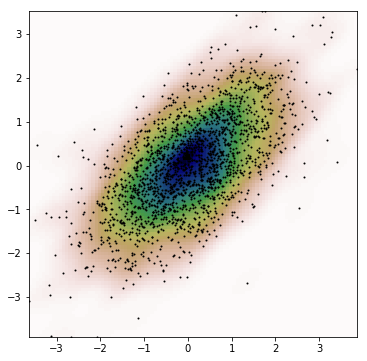

In [174]:
#产生2元数据
def measure(n):
    
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(scale=0.5, size=n)
    
    return m1+m2, m1-m2

m1, m2 = measure(2000)
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

#然后我们对这些数据使用KDE：
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel.evaluate(positions).T, X.shape)

#最后我们把估计的双峰分布以colormap形式显示出来，并且在上面画出每个数据点

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[xmin, xmax, ymin, ymax])
ax.plot(m1, m2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

Finally,最后一部分的笔记是**《Part3 Python的可视化技巧的总结》**,欢迎略读，如有帮助，不胜荣幸。